># AUTHOR: ALEX JUMA
>
>### Need some Data Analysis work done?
>>Contact me:
>> - Phone Number: **+254746209898**
>>- Email: **jumalex99@gmail.com**
>>- Instagram: **ajuma_tech**
>
>### *~All code seen in this notebook is my own*

## About this file
Data includes country, locality, market, goods purchased, price & currency used, quantity exchanged, and month/year of purchase.

- adm0_id: country id
- adm0_name: country name
- adm1_id: locality id
- adm1_name: locality name
- mkt_id: market id
- mkt_name: market name
- cm_id: commodity purchase id
- cm_name: commodity purchased
- cur_id: currency id
- cur_name: name of currency
- pt_id: market type id
- pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
- um_id: measurement id
- um_name: unit of goods measurement
- mp_month: month recorded
- mpyear: year recorded
- mpprice: price paid
- mp_commoditysource: Source supplying price information

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('global_food_prices.csv', parse_dates=['mp_year'])
df

C:\Users\jumal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014-01-01,50.0000,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014-01-01,50.0000,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014-01-01,50.0000,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014-01-01,50.0000,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014-01-01,50.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021-01-01,233.3333,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021-01-01,112.5000,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021-01-01,114.0000,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021-01-01,59.5000,NaN


In [3]:
df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   adm0_id             float64       
 1   adm0_name           object        
 2   adm1_id             int64         
 3   adm1_name           object        
 4   mkt_id              int64         
 5   mkt_name            object        
 6   cm_id               int64         
 7   cm_name             object        
 8   cur_id              float64       
 9   cur_name            object        
 10  pt_id               int64         
 11  pt_name             object        
 12  um_id               int64         
 13  um_name             object        
 14  mp_month            int64         
 15  mp_year             datetime64[ns]
 16  mp_price            float64       
 17  mp_commoditysource  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(7)
memory usage: 281.6+ MB


In [5]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_price,mp_commoditysource
count,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2050638.0,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,0.0
mean,1.004064e+03,2.631071e+04,1.591207e+03,2.201166e+02,0.0,1.491768e+01,1.486924e+01,6.363021e+00,6.413984e+03,NaN
std,7.163519e+03,1.159529e+05,1.181314e+03,1.938963e+02,0.0,2.831222e-01,2.598690e+01,3.403189e+00,1.069772e+05,NaN
min,1.000000e+00,0.000000e+00,8.000000e+01,5.000000e+01,0.0,1.400000e+01,5.000000e+00,1.000000e+00,0.000000e+00,NaN
25%,1.050000e+02,1.510000e+03,6.440000e+02,7.300000e+01,0.0,1.500000e+01,5.000000e+00,3.000000e+00,4.500000e+01,NaN
50%,1.500000e+02,2.156000e+03,1.441000e+03,1.410000e+02,0.0,1.500000e+01,5.000000e+00,6.000000e+00,2.465558e+02,NaN
75%,2.050000e+02,3.433000e+03,2.331000e+03,3.030000e+02,0.0,1.500000e+01,9.000000e+00,9.000000e+00,1.200000e+03,NaN
max,7.000100e+04,9.000220e+05,6.083000e+03,8.930000e+02,0.0,1.800000e+01,1.750000e+02,1.200000e+01,2.177778e+07,NaN


In [6]:
df.corr()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_price,mp_commoditysource
adm0_id,1.000000,-0.010473,0.000308,0.003952,NaN,-0.014030,0.069480,-0.002146,-0.004308,NaN
adm1_id,-0.010473,1.000000,0.021478,-0.002313,NaN,0.042013,-0.014481,0.005130,-0.007049,NaN
mkt_id,0.000308,0.021478,1.000000,0.291922,NaN,0.086040,0.057121,-0.015395,0.003134,NaN
cm_id,0.003952,-0.002313,0.291922,1.000000,NaN,0.033348,0.181395,-0.007056,0.013392,NaN
cur_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pt_id,-0.014030,0.042013,0.086040,0.033348,NaN,1.000000,-0.078770,-0.001674,-0.054844,NaN
um_id,0.069480,-0.014481,0.057121,0.181395,NaN,-0.078770,1.000000,-0.004329,0.012830,NaN
mp_month,-0.002146,0.005130,-0.015395,-0.007056,NaN,-0.001674,-0.004329,1.000000,-0.003331,NaN
mp_price,-0.004308,-0.007049,0.003134,0.013392,NaN,-0.054844,0.012830,-0.003331,1.000000,NaN
mp_commoditysource,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#let's see which columns contain null values and if so, how many? 
df.isnull().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              611016
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    2050638
dtype: int64

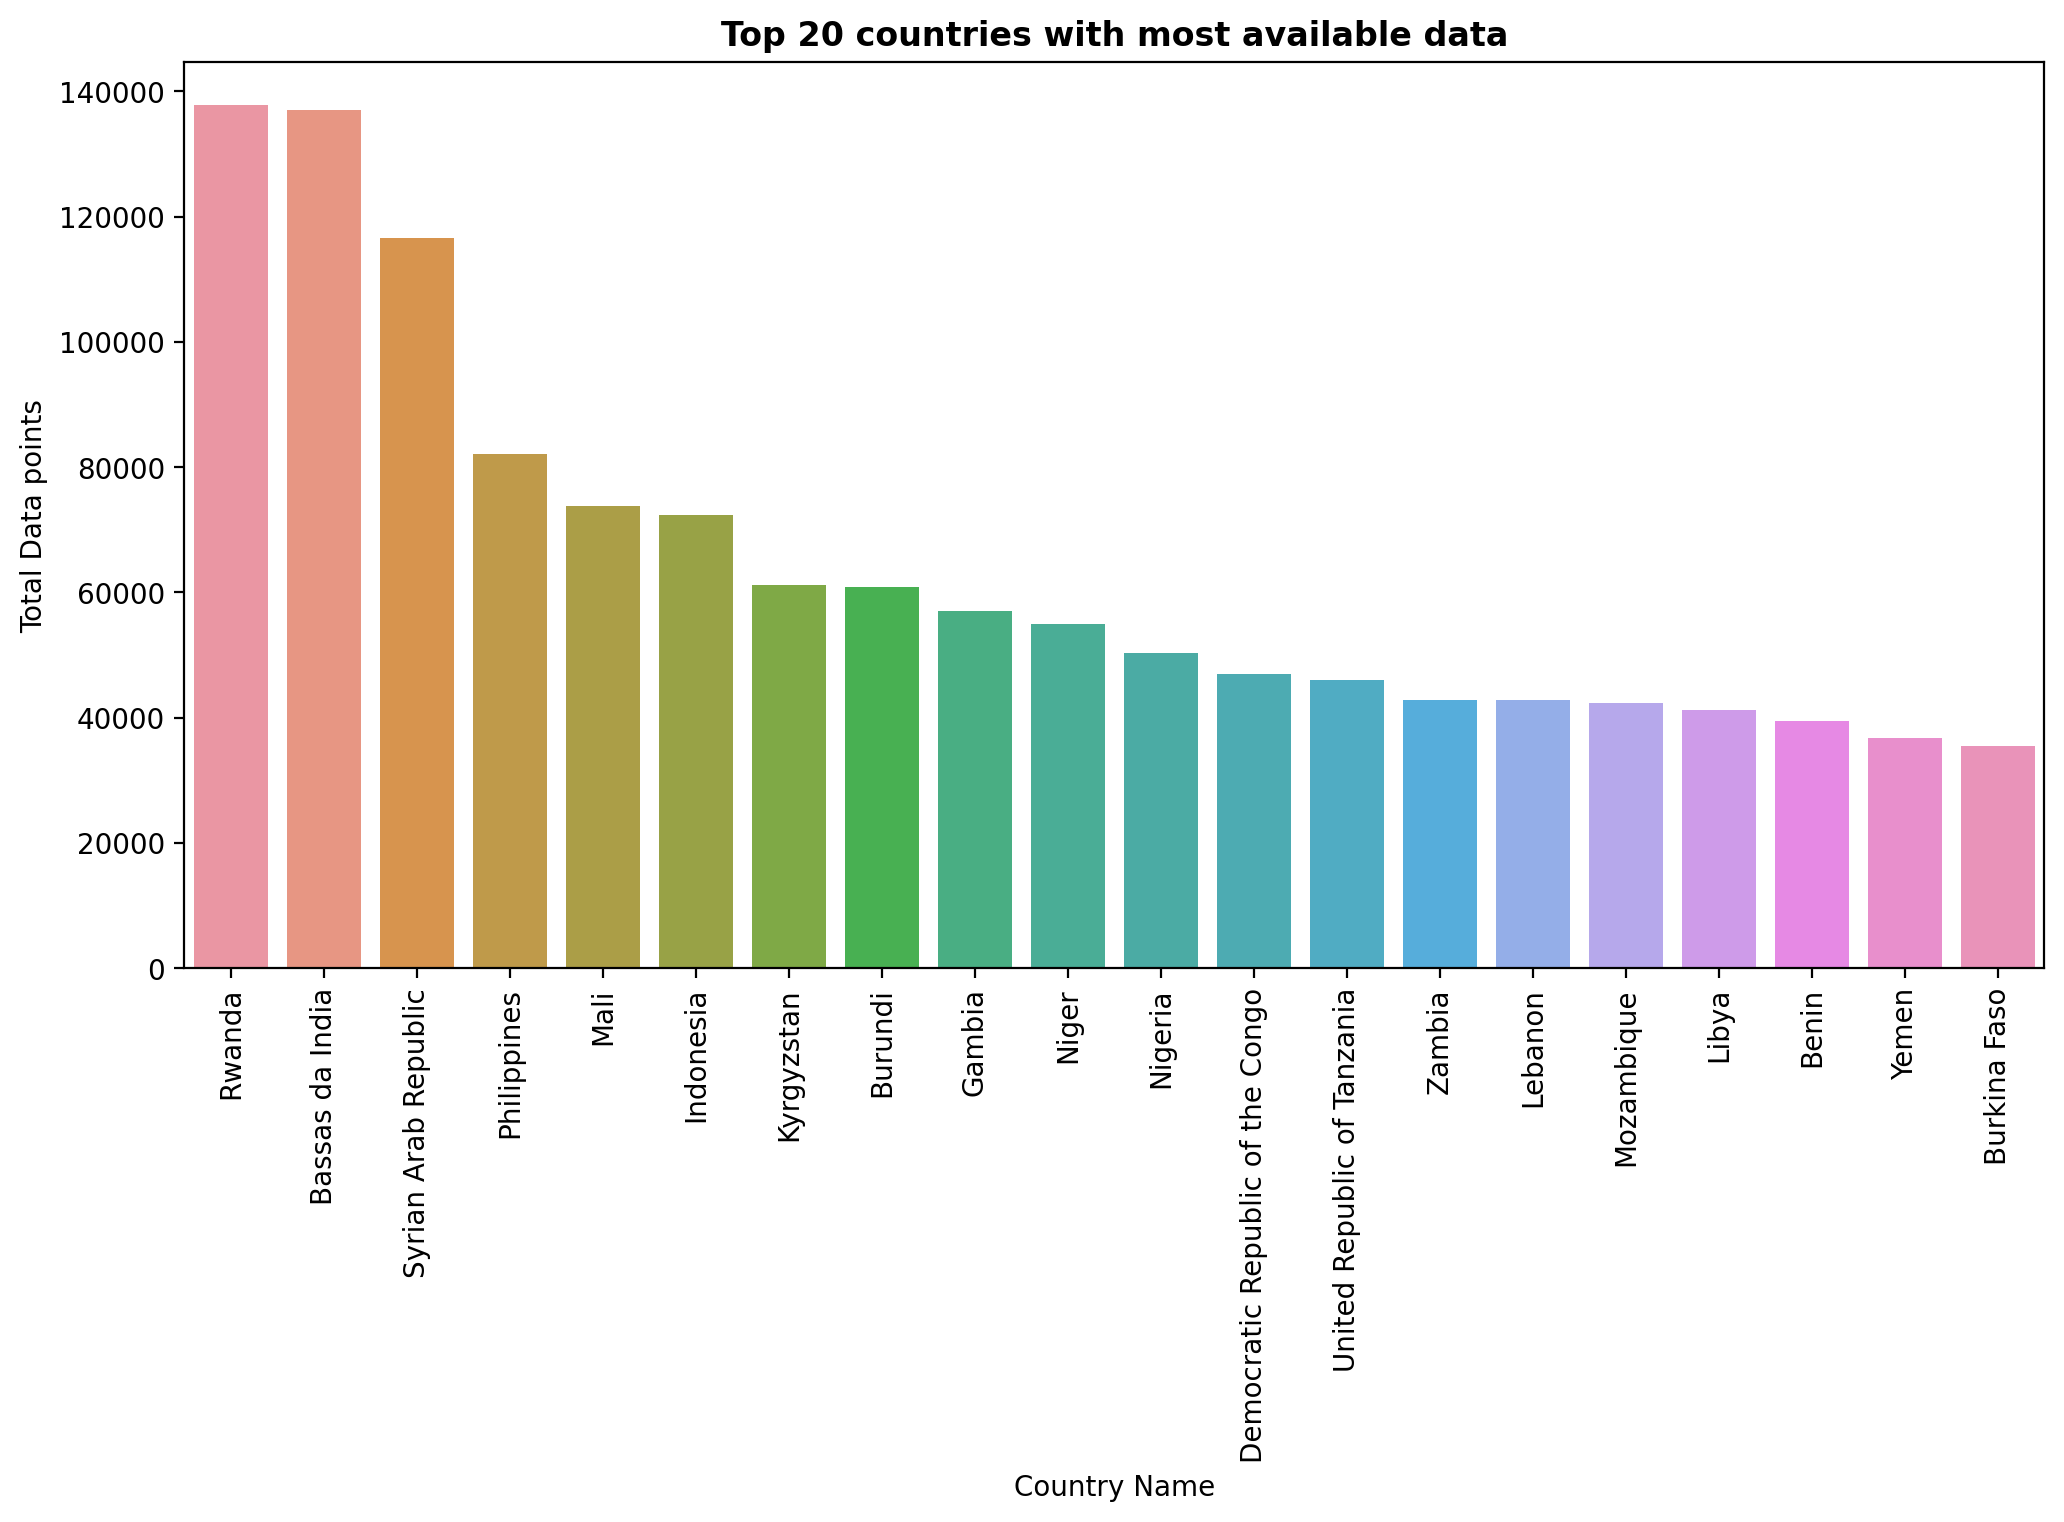

In [60]:
#Top 20 countries with the most available data 

top_20 = df.copy()
top_20 = top_20[['adm0_id','adm0_name']].groupby('adm0_name').count()['adm0_id'].sort_values(ascending=False)[:20]
top_20

fig, ax = plt.subplots(1,1,sharex=True,figsize=(12,6),dpi=200)
fig = sns.barplot(x=top_20.index, y=top_20.values, ax=ax)
fig.set_xticklabels(labels=top_20.index,rotation=90)
fig.set_title('Top 20 countries with most available data',
               fontweight=700)
fig.set_xlabel('Country Name')
fig.set_ylabel('Total Data points')
plt.show()

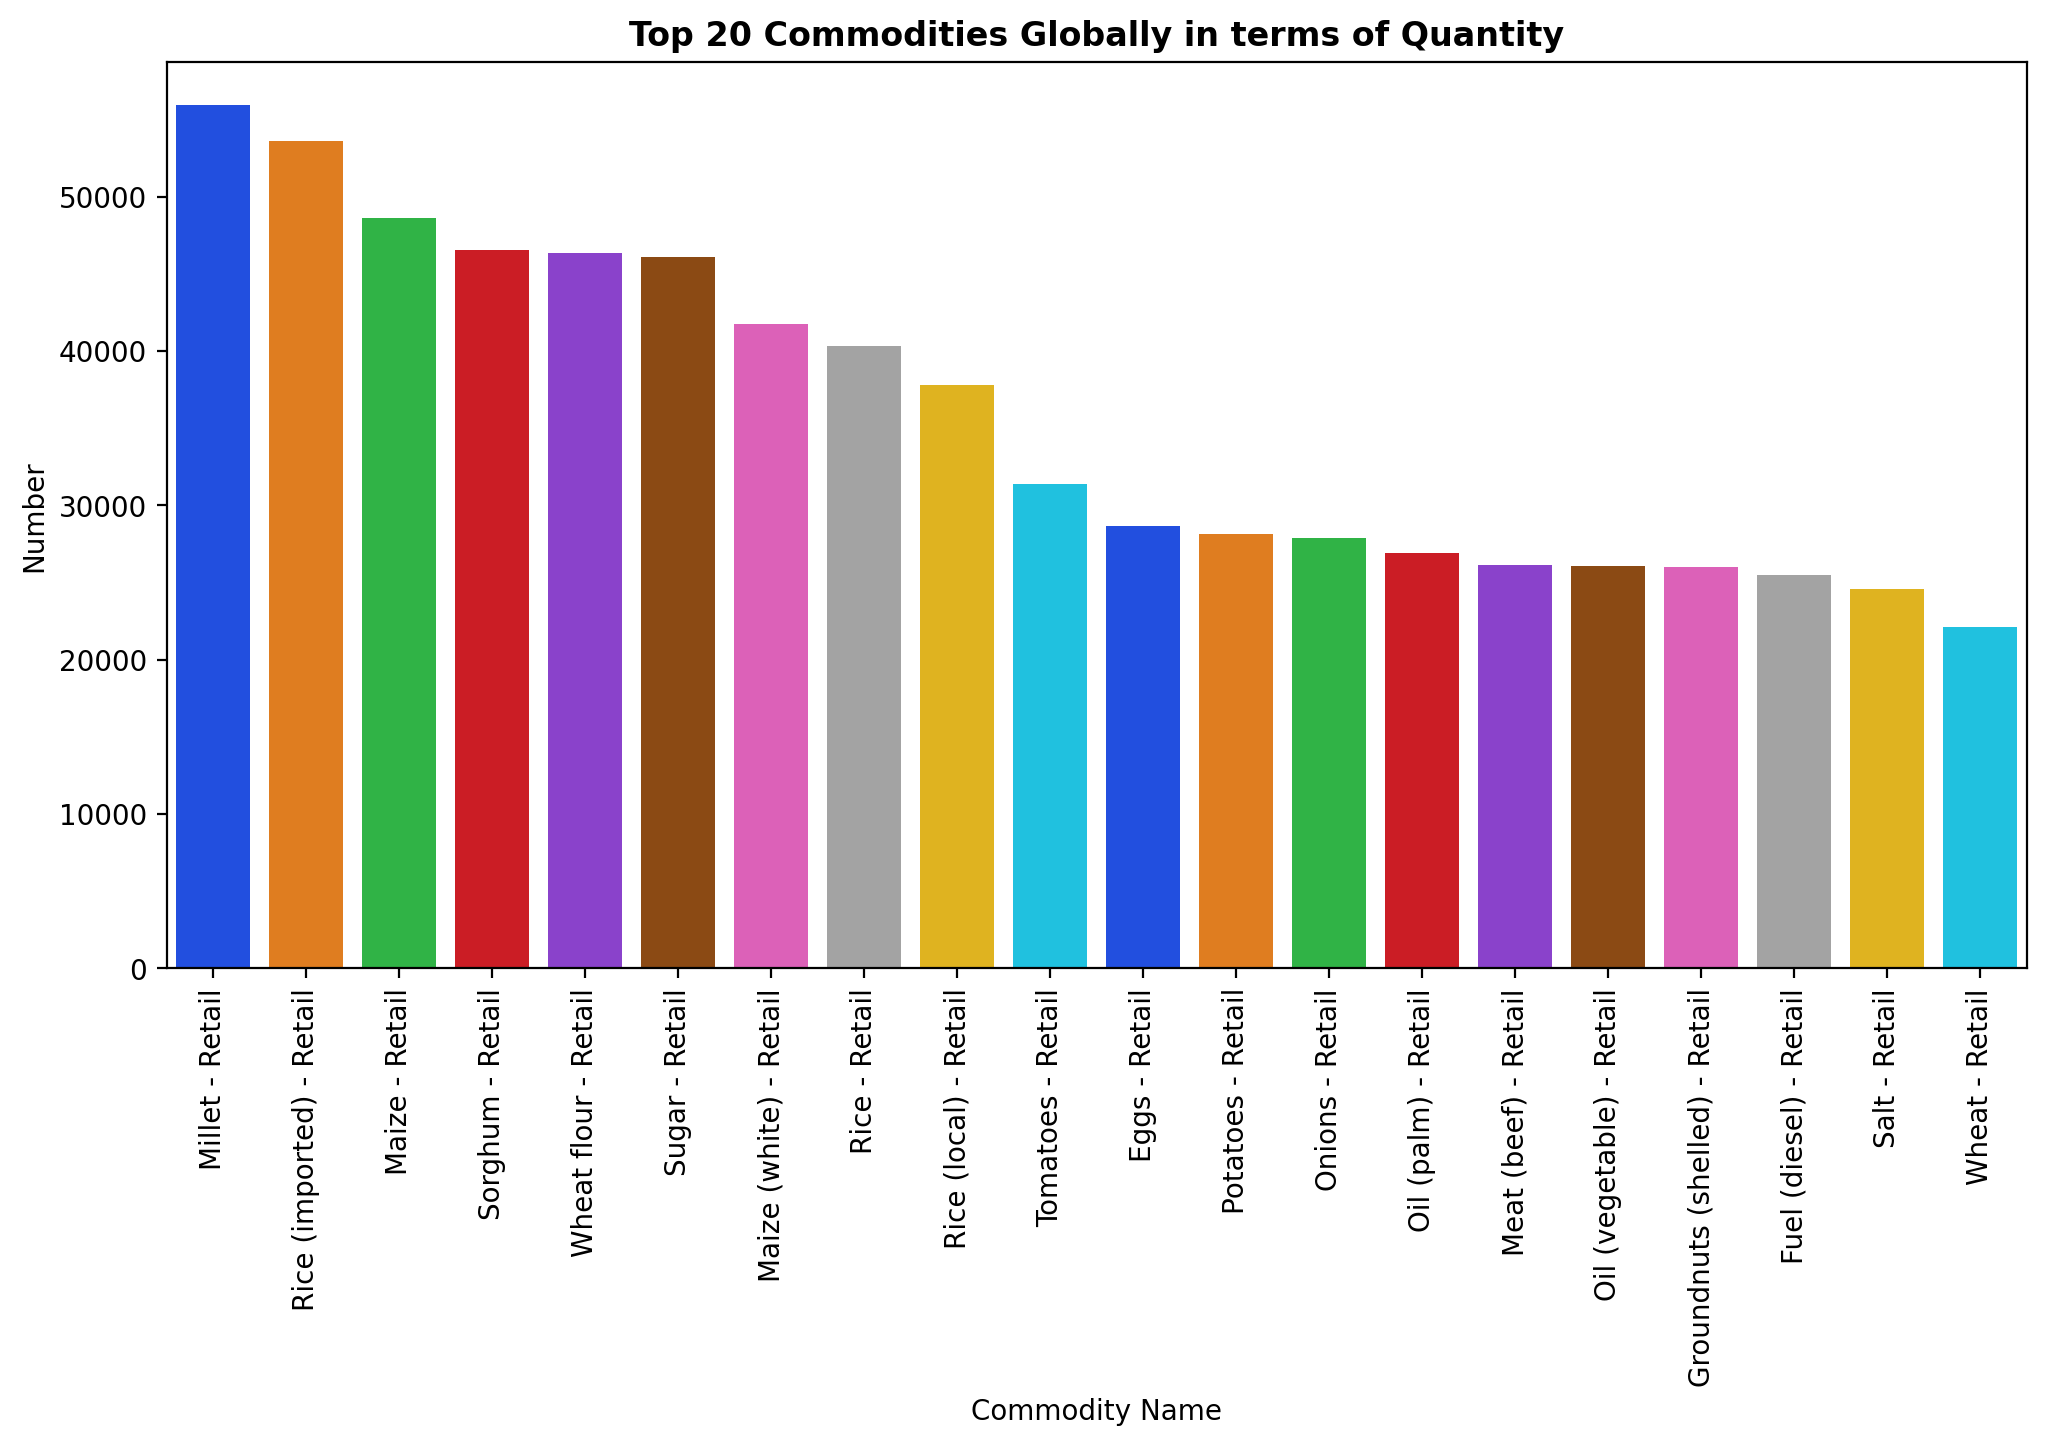

In [9]:
#Top 20 most reported commodities globally 

t20_comm = df.copy()
t20_comm = t20_comm[['cm_id','cm_name']]
t20_comm = t20_comm.groupby('cm_name').count()['cm_id'].sort_values(ascending=False)[:20]
t20_comm

fig, ax = plt.subplots(1,1,sharex=True,figsize=(12,6),dpi=200)
fig = sns.barplot(x=t20_comm.index,
                  y=t20_comm.values,
                  ax=ax,
                  palette='bright')
fig.set_xticklabels(labels=t20_comm.index, rotation=90)
fig.set_title('Top 20 Commodities Globally in terms of Quantity',
              fontweight=700)
fig.set_xlabel('Commodity Name')
fig.set_ylabel('Number')
plt.show()

In [10]:
#Let's isolate data for Kenya

df_ke = df.copy()
df_ke = df_ke[df_ke['adm0_name'] == 'Kenya']
df_ke

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
813323,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,1,2006-01-01,33.630,NaN
813324,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,2,2006-01-01,39.478,NaN
813325,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,3,2006-01-01,44.686,NaN
813326,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,4,2006-01-01,43.837,NaN
813327,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,5,2006-01-01,39.734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822202,133.0,Kenya,51331,Rift Valley,3360,Lodwar town,794,Milk (UHT) - Retail,0.0,KES,15,Retail,25,500 ML,3,2021-01-01,80.000,NaN
822203,133.0,Kenya,51331,Rift Valley,3360,Lodwar town,794,Milk (UHT) - Retail,0.0,KES,15,Retail,25,500 ML,4,2021-01-01,80.000,NaN
822204,133.0,Kenya,51331,Rift Valley,3360,Lodwar town,794,Milk (UHT) - Retail,0.0,KES,15,Retail,25,500 ML,5,2021-01-01,40.000,NaN
822205,133.0,Kenya,51331,Rift Valley,3360,Lodwar town,794,Milk (UHT) - Retail,0.0,KES,15,Retail,25,500 ML,7,2021-01-01,52.500,NaN


In [11]:
#let's look at the avg change in food price over the years 
avg_pr = df_ke[['mp_year','mp_price']]
avg_pr['mp_year'] = avg_pr['mp_year'].dt.strftime('%Y')
avg_pr

<ipython-input-11-4471ef19e8e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_pr['mp_year'] = avg_pr['mp_year'].dt.strftime('%Y')


,mp_year,mp_price
813323,2006,33.630
813324,2006,39.478
813325,2006,44.686
813326,2006,43.837
813327,2006,39.734
...,...,...
822202,2021,80.000
822203,2021,80.000
822204,2021,40.000
822205,2021,52.500


In [12]:
avg_pr = avg_pr.groupby('mp_year')['mp_price'].mean()
avg_pr

mp_year
2006     889.691147
2007     862.127601
2008    1216.740807
2009    1427.703412
2010    1236.044759
2011    1729.829905
2012    1888.882951
2013    1853.849119
2014    1876.379409
2015    1650.702280
2016    1666.571933
2017    2033.998236
2018    1694.125230
2019    1914.984149
2020     763.683048
2021     118.837351
Name: mp_price, dtype: float64

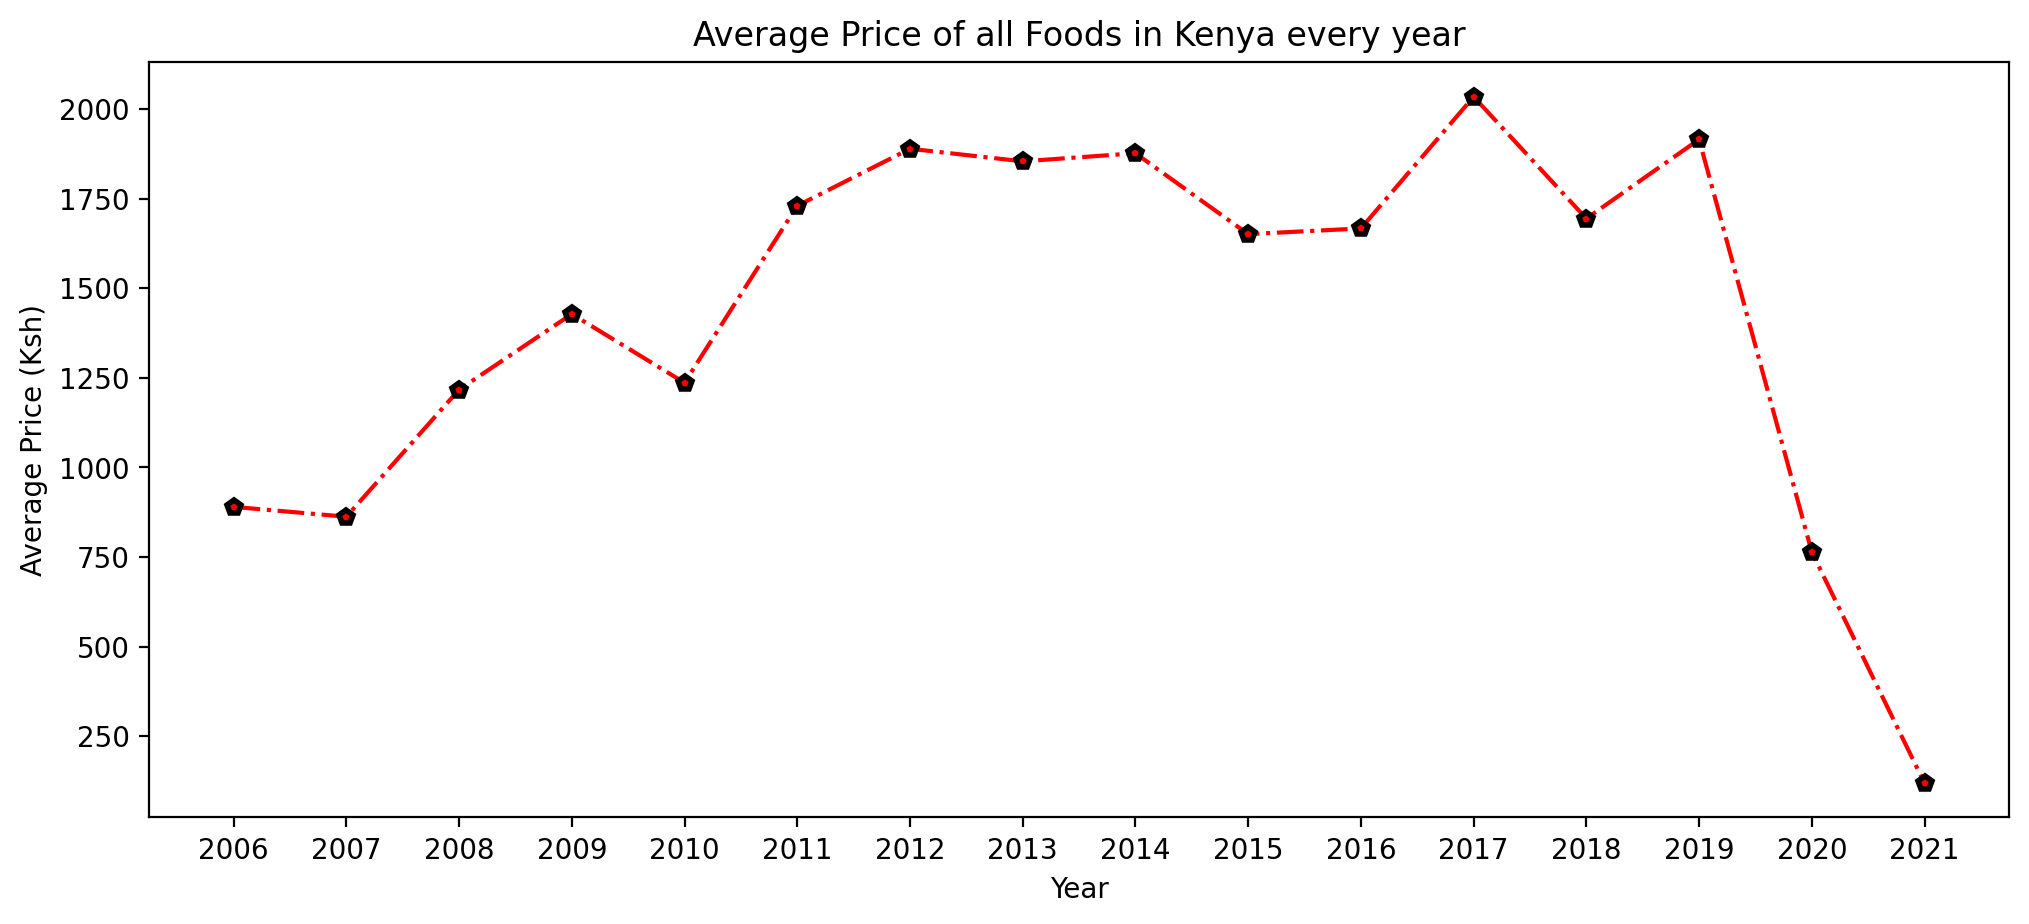

In [55]:
fig, ax = plt.subplots(1,1,sharex=True,dpi=200,figsize=(12,5))
fig = sns.lineplot(x=avg_pr.index,
                   y=avg_pr.values, 
                   ax=ax,
                   ls='-.',
                   color='red',
                   marker='p',
                   markeredgewidth=2,
                   markeredgecolor='black',
                   markersize=5)

fig.set_title('Average Price of all Foods in Kenya every year')
fig.set_xlabel('Year')
fig.set_ylabel('Average Price (Ksh)')
plt.show()

In [14]:
years=df_ke['mp_year'].dt.strftime('%Y').unique()
#df_ke[df_ke['mp_year'] == '2021']['mp_price'].max()

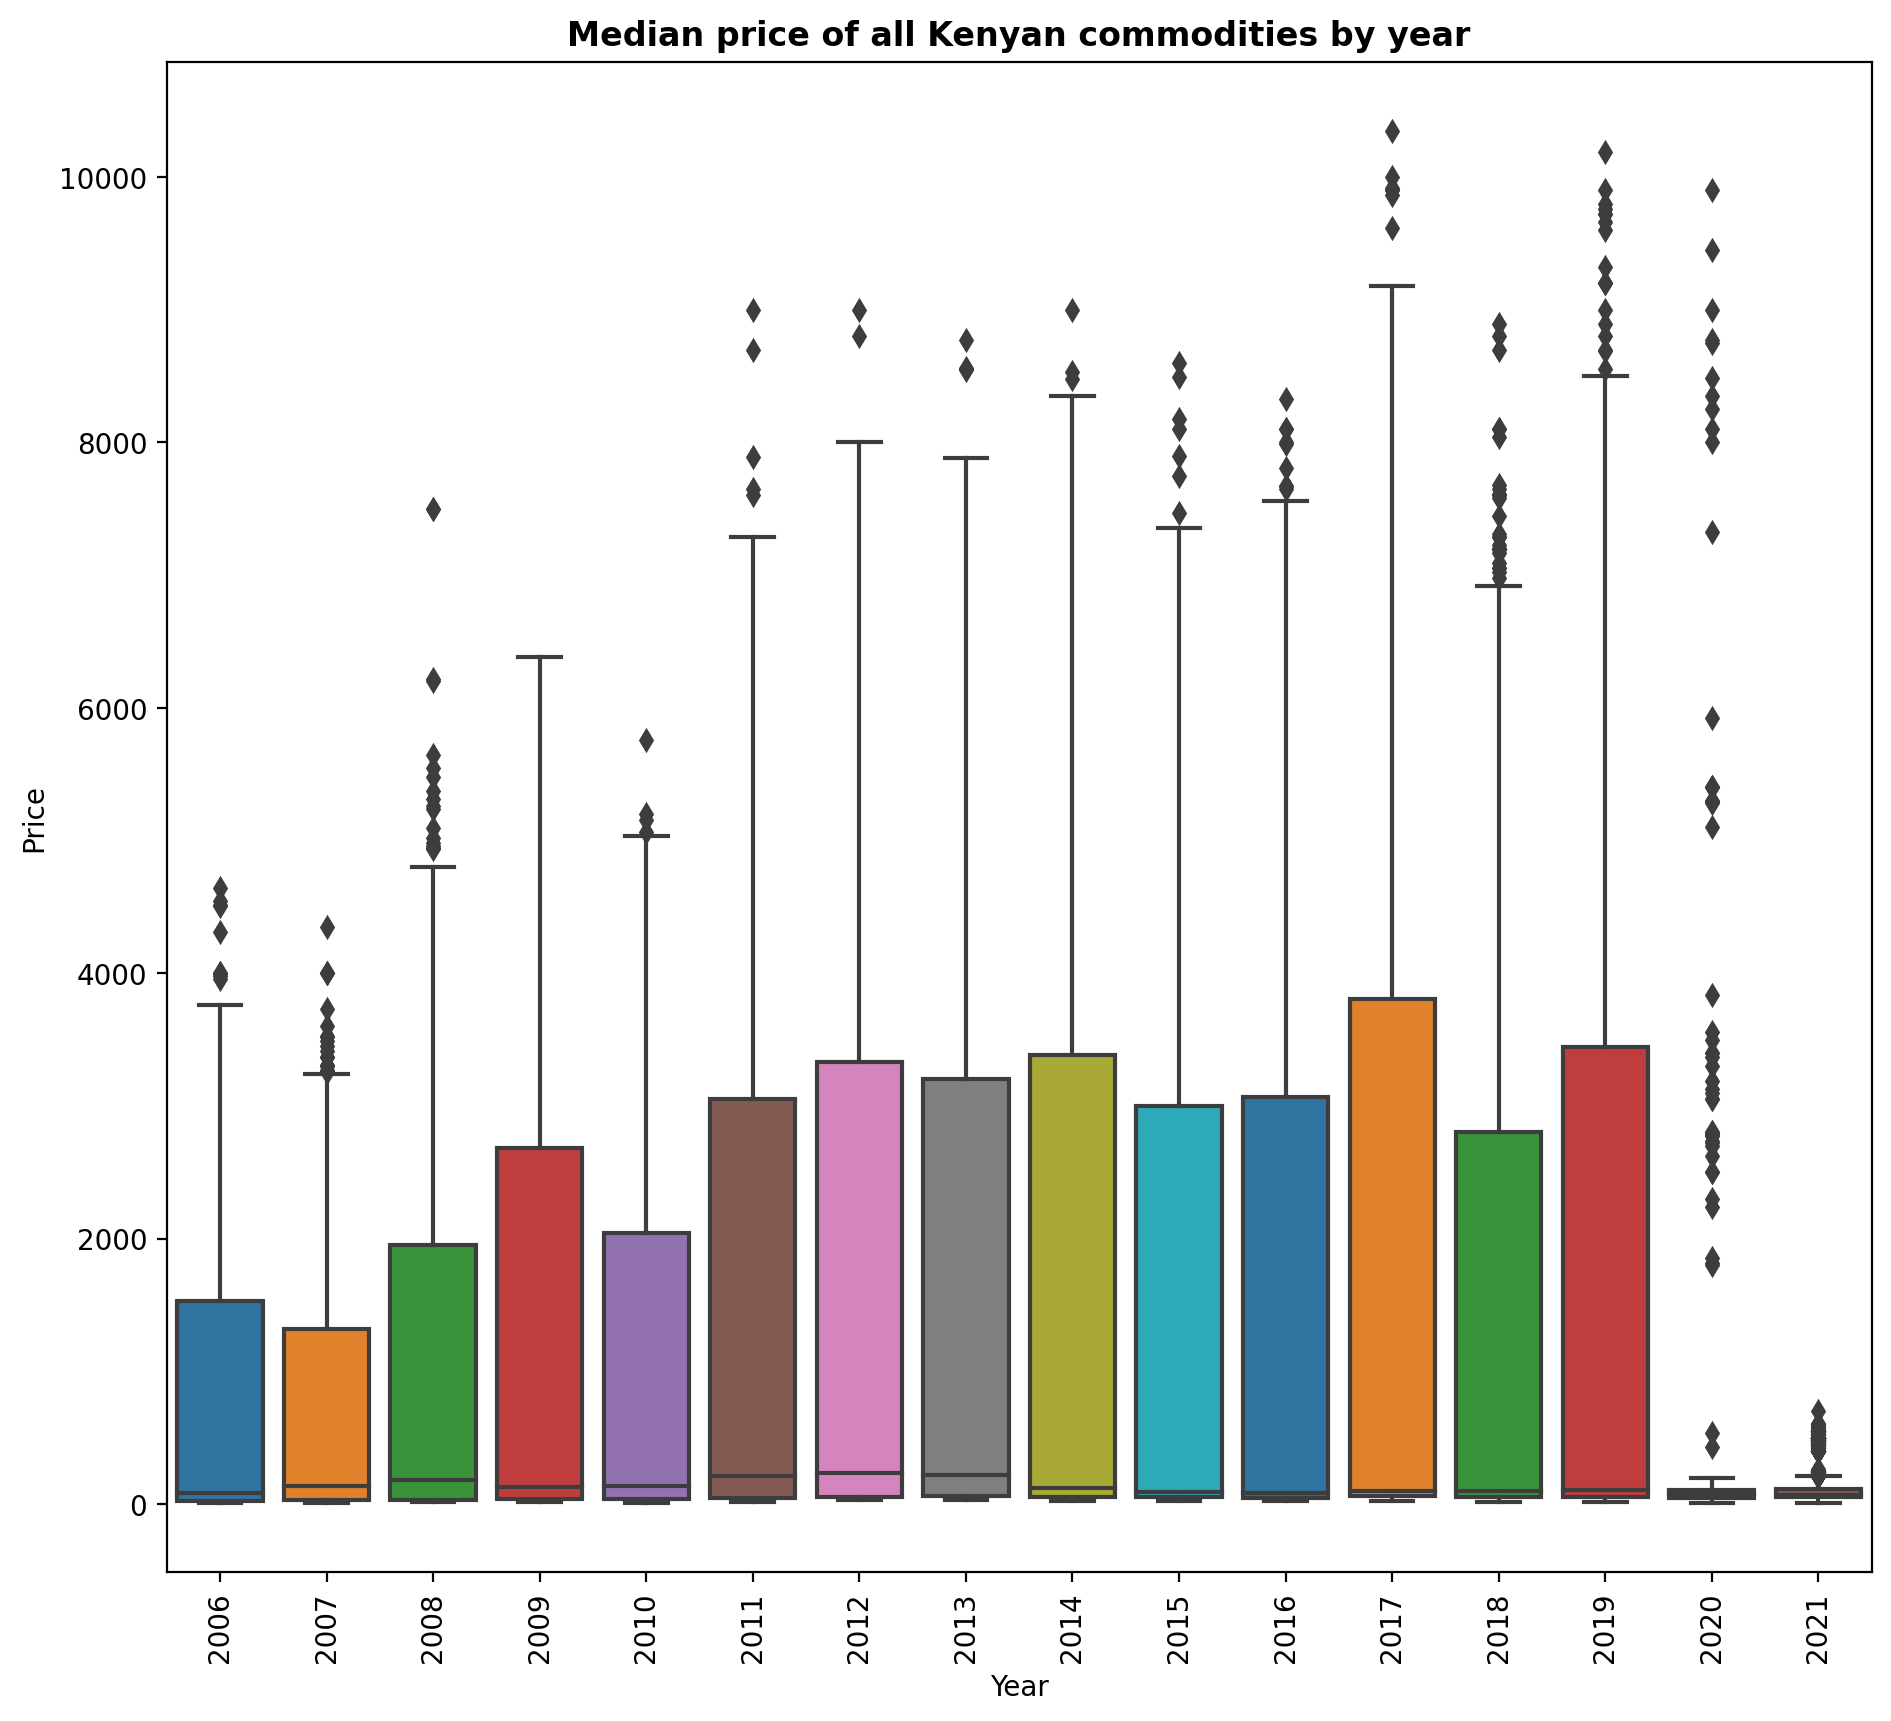

In [59]:
fig, ax = plt.subplots(1,1,sharex=True,dpi=200,figsize=(11,10))
fig = sns.boxplot(data=df_ke, x='mp_year', y='mp_price', ax=ax,
                 palette='tab10')
fig.set_xticklabels(labels=years, rotation=90)
fig.set_title('Median price of all Kenyan commodities by year', 
              fontweight=600)
fig.set_xlabel('Year')
fig.set_ylabel('Price')
plt.show()

In [16]:
#let's look at the maximum commodity price so we can set the upper limit for the kde clip
df_ke['mp_price'].max()

10350.0

Text(0.5, 0, 'Commodity Prices')

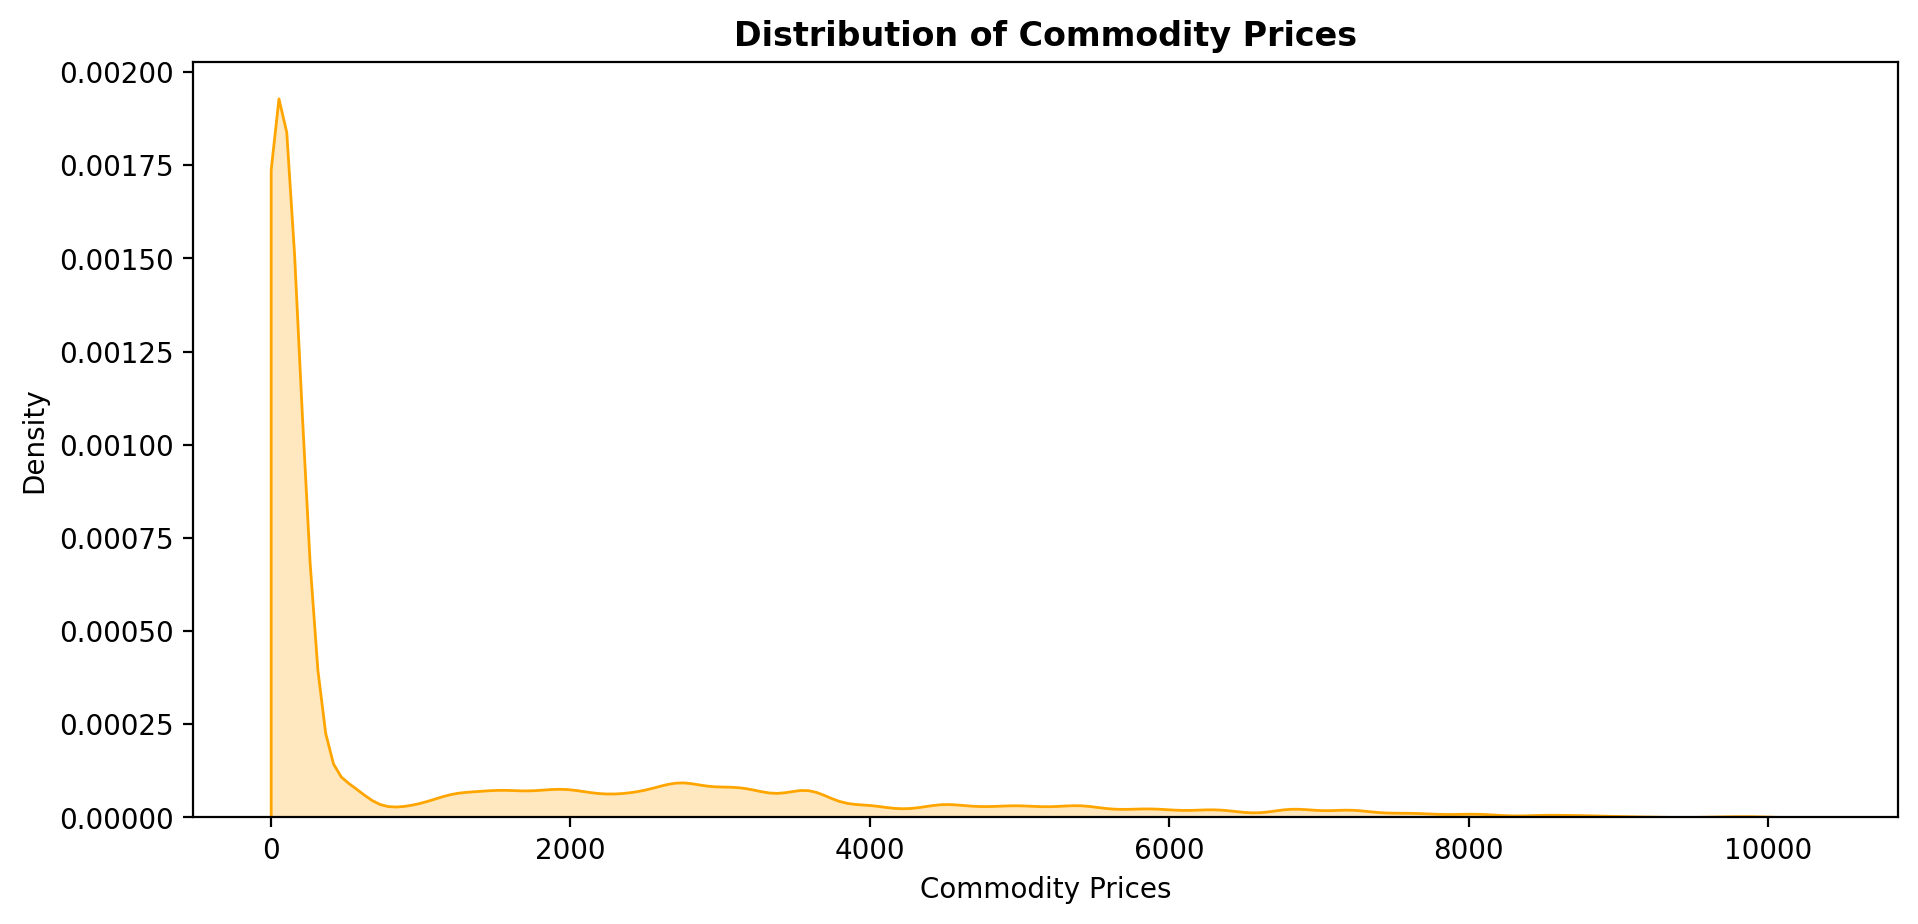

In [17]:
#let's look at the distributions of commodity prices
fig, ax = plt.subplots(1,1,dpi=200,figsize=(11,5))
sns.kdeplot(data=df_ke, x='mp_price',ax=ax, bw_adjust=0.4, clip=[0,10350], shade=True,
           color='orange')

ax.set_title('Distribution of Commodity Prices', fontweight=600)
ax.set_xlabel('Commodity Prices')
#we can see that most of the commodities are valued at about Ksh400 and below

In [18]:
df_ke.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
813323,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,1,2006-01-01,33.630,NaN
813324,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,2,2006-01-01,39.478,NaN
813325,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,3,2006-01-01,44.686,NaN
813326,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,4,2006-01-01,43.837,NaN
813327,133.0,Kenya,51326,Coast,191,Mombasa,50,Beans - Wholesale,0.0,KES,14,Wholesale,5,KG,5,2006-01-01,39.734,NaN


In [19]:
#what are the top 20 most expensive products on average sold in Kenya over the years?
#barplot 

df_exp = df_ke.groupby('cm_name').mean()['mp_price'].sort_values(ascending=False)[:20]
df_exp
#len(df_exp)

cm_name
Beans (dry) - Wholesale            5883.605415
Sorghum - Wholesale                3602.987174
Maize (white) - Wholesale          2576.193956
Potatoes (Irish) - Wholesale       1910.787575
Meat (goat) - Retail                503.921953
Meat (beef) - Retail                485.465605
Meat (camel) - Retail               458.881796
Oil (vegetable) - Retail            192.795277
Cooking fat - Retail                170.822728
Sugar - Retail                      109.371916
Fuel (petrol-gasoline) - Retail     101.696567
Rice - Retail                        98.874753
Milk (camel, fresh) - Retail         97.230391
Beans (dry) - Retail                 92.705293
Fuel (diesel) - Retail               91.567612
Fuel (kerosene) - Retail             76.858507
Milk (cow, fresh) - Retail           76.666667
Wheat flour - Retail                 69.912291
Maize flour - Retail                 62.277437
Cabbage - Retail                     61.356665
Name: mp_price, dtype: float64

In [61]:
#Part of the brainstorming/problem solving process so I'll just leave this here lol ;) 

#df_exp = df_ke.groupby(['cm_name', 'mp_year']).mean()['mp_price'].unstack()
#df_exp

In [21]:
#fig, ax = plt.subplots(1,1,sharex=True,dpi=200,figsize=(11,5))
#fig = sns.barplot(x=df_exp.index.get_level_values(0), y=df_exp.values, ax=ax,
#                  palette='dark',
#                  ci='sd')

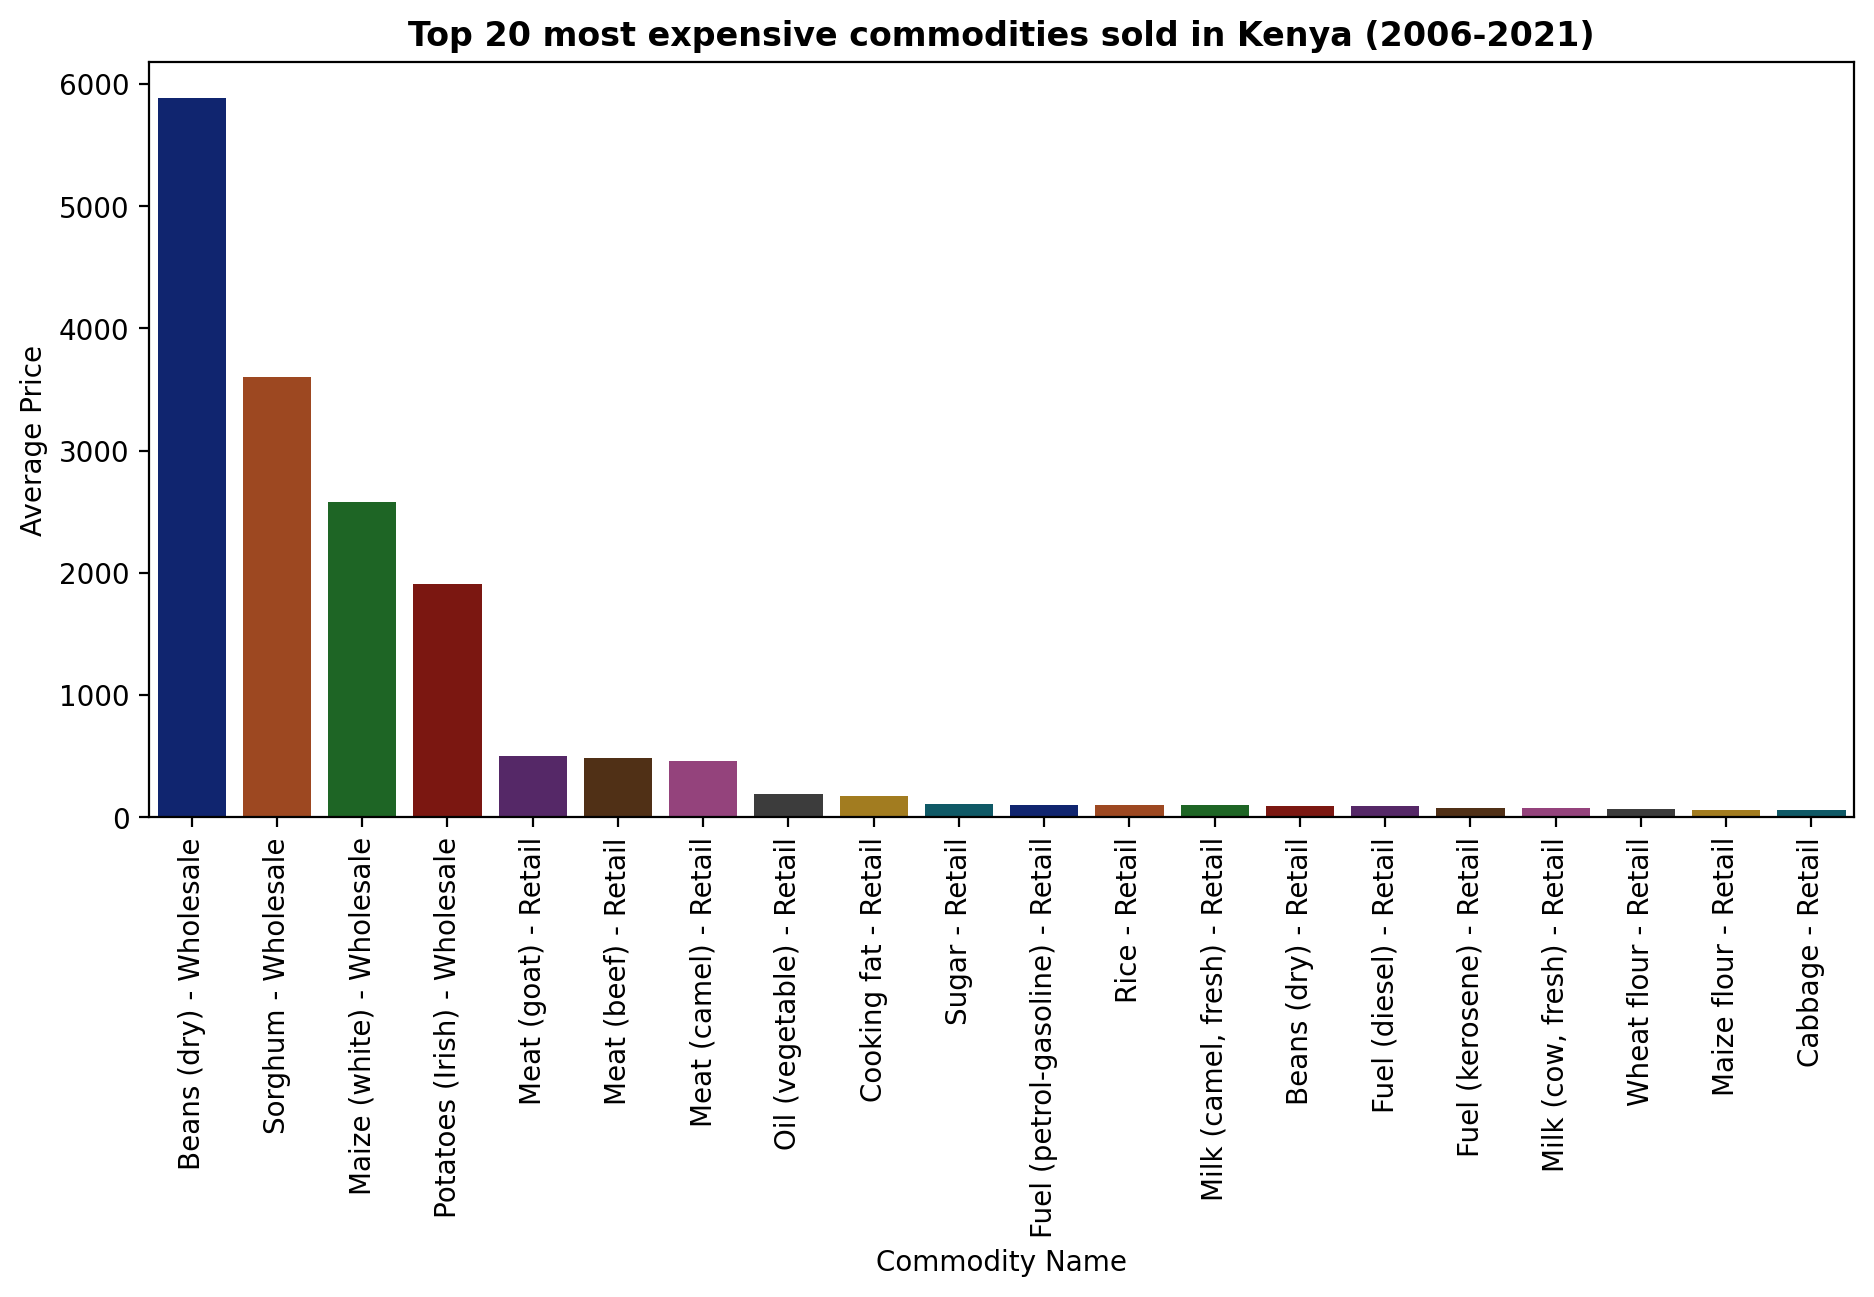

In [22]:
fig, ax = plt.subplots(1,1,sharex=True,dpi=200,figsize=(11,5))
fig = sns.barplot(x=df_exp.index, y=df_exp.values, ax=ax,
                  palette='dark',
                  ci='sd')

ax.set_title('Top 20 most expensive commodities sold in Kenya (2006-2021)',
             fontweight=600)

ax.set_xlabel('Commodity Name')
ax.set_ylabel('Average Price')

fig.set_xticklabels(labels=df_exp.index, rotation=90); #semi-colon same as coding plt.show()

In [28]:
df_expyr = df_ke[df_ke['cm_name'].isin(df_exp.index[:5])]
df_expyr['mp_year'] = df['mp_year'].dt.strftime('%Y')
df_expyr = df_expyr.sort_values(by=['mp_year'], ascending=True)
df_expyr

<ipython-input-28-945f5591cd80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expyr['mp_year'] = df['mp_year'].dt.strftime('%Y')


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
816508,133.0,Kenya,51328,Nairobi,184,Nairobi,262,Beans (dry) - Wholesale,0.0,KES,14,Wholesale,17,90 KG,8,2006,2888.0000,NaN
819763,133.0,Kenya,51331,Rift Valley,185,Eldoret town,67,Maize (white) - Wholesale,0.0,KES,14,Wholesale,17,90 KG,12,2006,1000.0000,NaN
819762,133.0,Kenya,51331,Rift Valley,185,Eldoret town,67,Maize (white) - Wholesale,0.0,KES,14,Wholesale,17,90 KG,11,2006,1000.0000,NaN
819761,133.0,Kenya,51331,Rift Valley,185,Eldoret town,67,Maize (white) - Wholesale,0.0,KES,14,Wholesale,17,90 KG,10,2006,1053.0000,NaN
819760,133.0,Kenya,51331,Rift Valley,185,Eldoret town,67,Maize (white) - Wholesale,0.0,KES,14,Wholesale,17,90 KG,9,2006,1124.3750,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817523,133.0,Kenya,51328,Nairobi,4628,Dandora (Nairobi),451,Meat (goat) - Retail,0.0,KES,15,Retail,5,KG,4,2021,550.0000,NaN
817522,133.0,Kenya,51328,Nairobi,4628,Dandora (Nairobi),451,Meat (goat) - Retail,0.0,KES,15,Retail,5,KG,2,2021,542.2222,NaN
817435,133.0,Kenya,51328,Nairobi,4627,Kibra (Nairobi),451,Meat (goat) - Retail,0.0,KES,15,Retail,5,KG,2,2021,525.0000,NaN
821338,133.0,Kenya,51331,Rift Valley,3244,Kalobeyei (Village 1),451,Meat (goat) - Retail,0.0,KES,15,Retail,5,KG,4,2021,500.0000,NaN


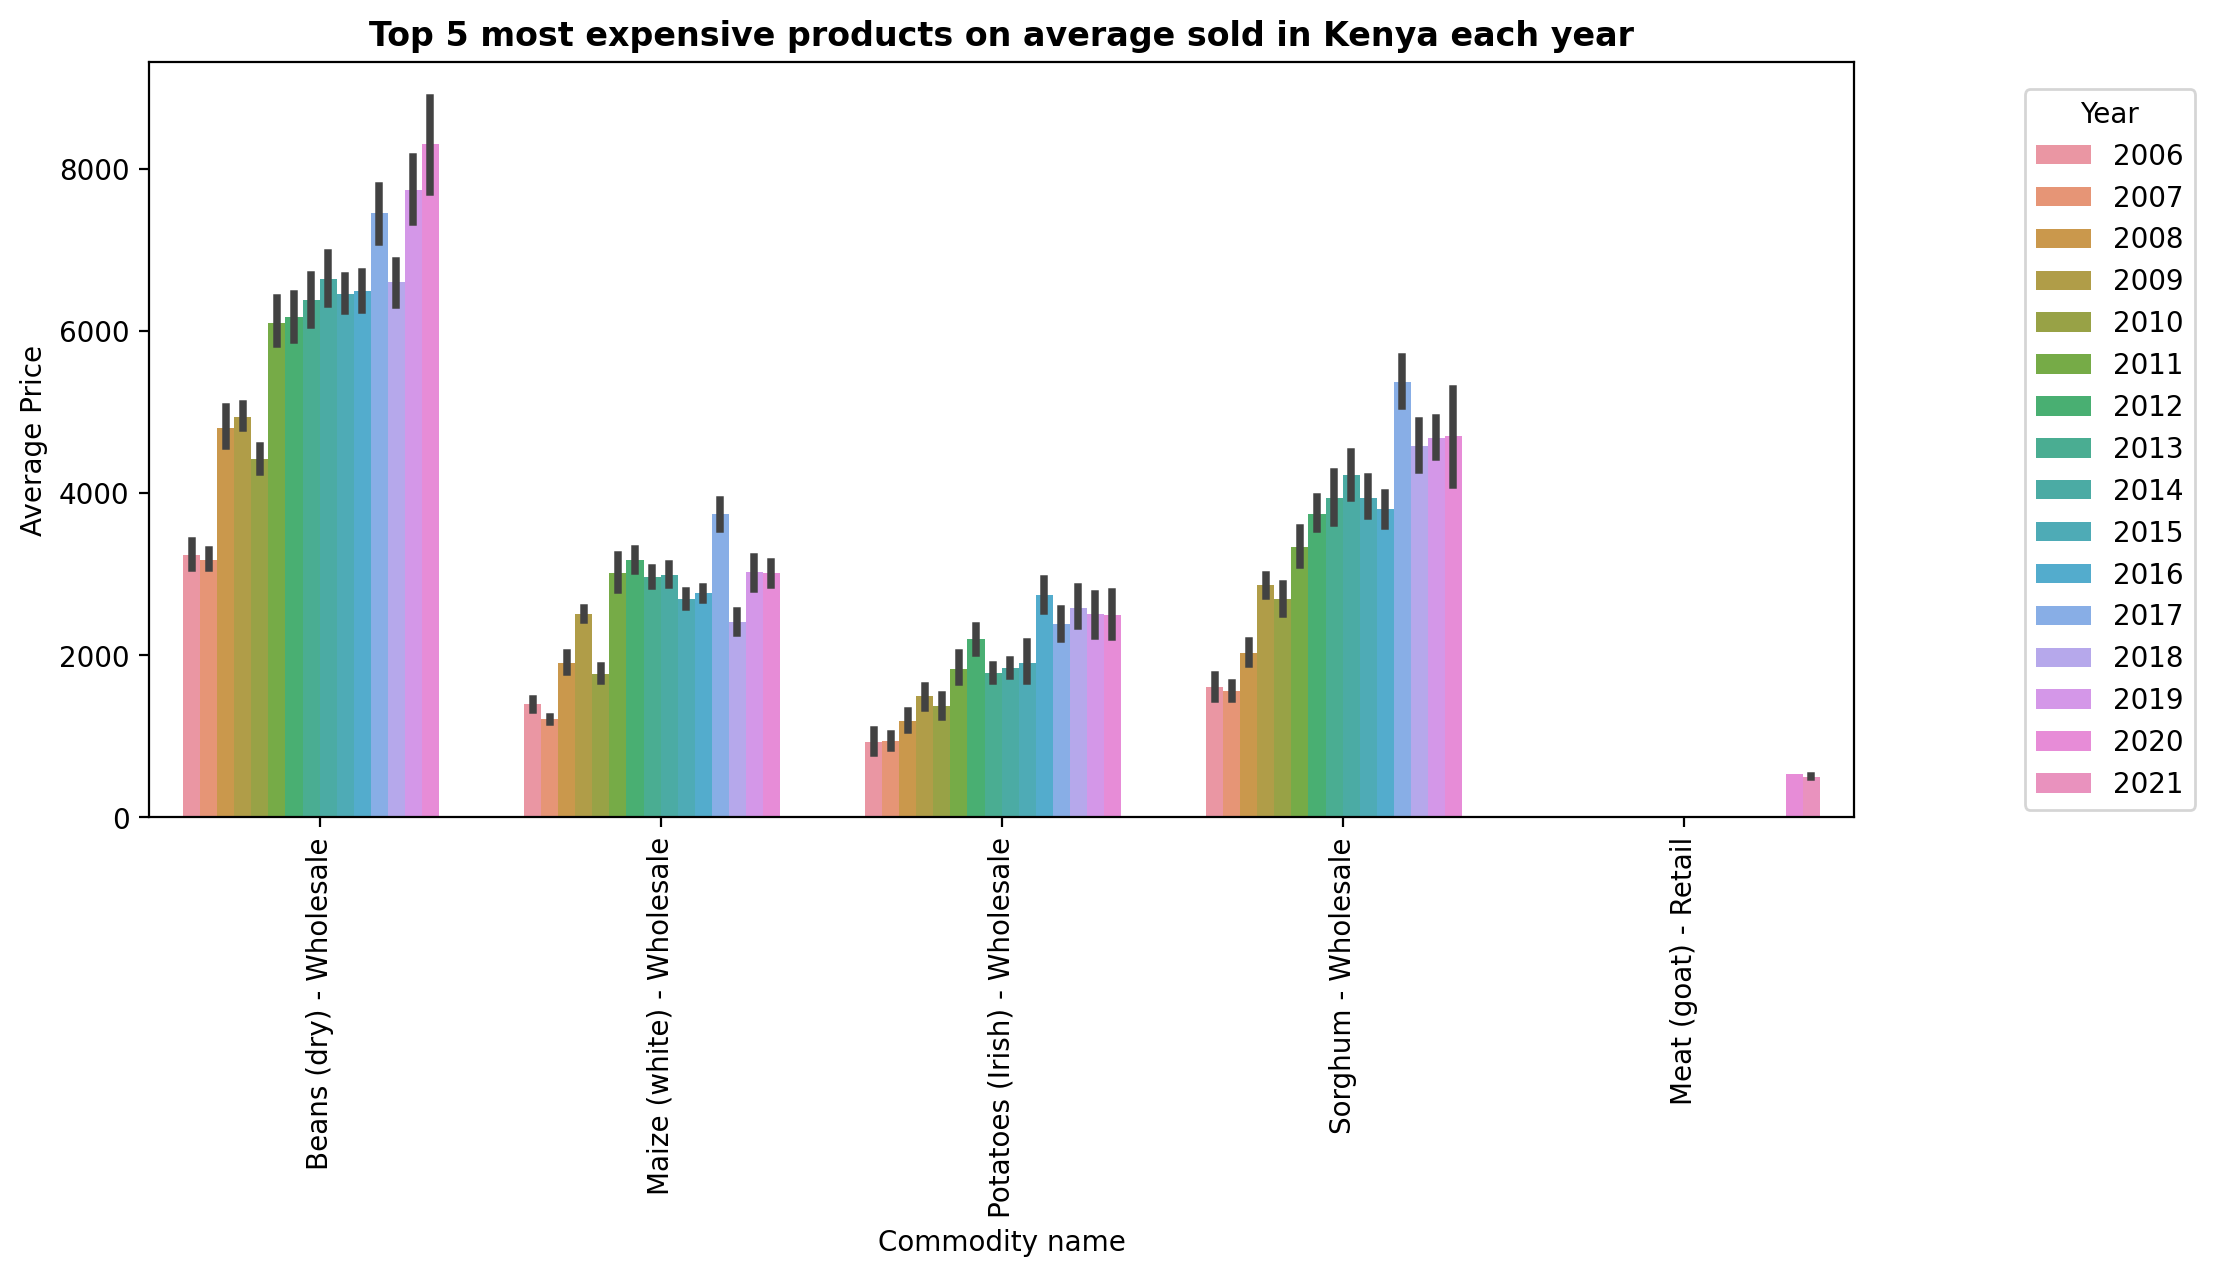

In [62]:
#what are the top 5 most expensive products on average sold in Kenya each year?

fig, ax = plt.subplots(1,1,sharex=True,dpi=200,figsize=(11,5))
fig = sns.barplot(x=df_expyr.cm_name,
                  y=df_expyr.mp_price, 
                  hue=df_expyr.mp_year,
                  ax=ax)

ax.set_title('Top 5 most expensive products on average sold in Kenya each year',
              fontweight=600)

ax.set_xlabel('Commodity name')
ax.set_ylabel('Average Price')

fig.set_xticklabels(labels=df_expyr.cm_name.unique(), rotation=90)

plt.legend(loc=[1.1,0.01], title='Year')

plt.show()